# Data Science Basics - Decision Tree - Complete Guide

For detailed theory read An introduction to Statistical Learning:

http://faculty.marshall.usc.edu/gareth-james/ISL/
A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It’s visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

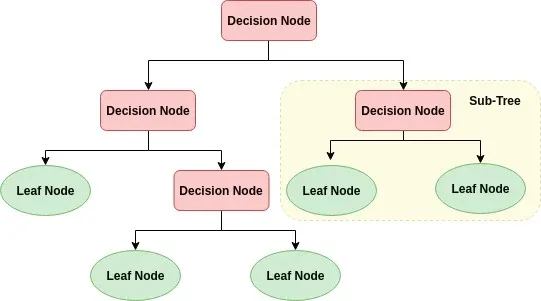

#### Example

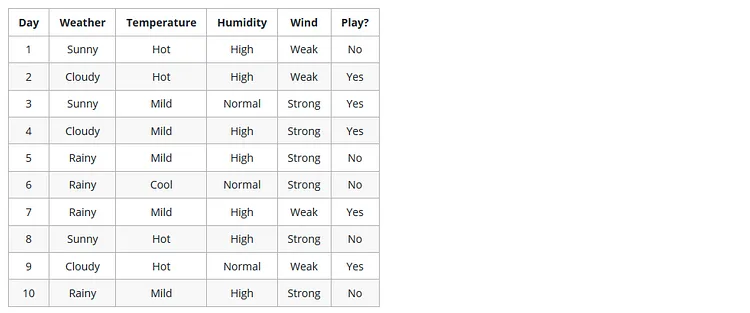

#### Why Decision Tree
 - Decision tress often mimic the human level thinking so its so simple to understand the data and make some good interpretations.
 - Decision trees actually make you see the logic for the data to interpret(not like black box algorithms like SVM,NN,etc..) .

#### How Decision Tree Works
 - Select the best attribute using Attribute Selection Measures(ASM) to split the records.
 - Make that attribute a decision node and breaks the dataset into smaller subsets.
 - Starts tree building by repeating this process recursively for each child until one of the condition will match:
  - All the tuples belong to the same attribute value.
  - There are no more remaining attributes.
  - There are no more instances.
  
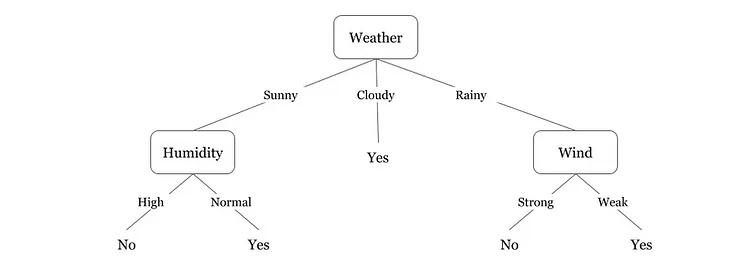

Here couple of algorithms to build a decision tree, we only talk about a few which are:

 - CART (Classification and Regression Trees) → uses Gini Index(Classification) as metric.
 - ID3 (Iterative Dichotomiser 3) → uses Entropy function and Information gain as metrics.

#### Decision Making in DT with Attribute Selection Measures(ASM)
 - Information Gain
 - Gain Ratio
 - Gini Index
 - Read Chapter 8: http://faculty.marshall.usc.edu/gareth-james/ISL/

#### Information Gain
In order to define information gain precisely, we begin by defining a measure commonly used in information theory, called entropy that characterizes the (im)purity of an arbitrary collection of examples.

#### Entropy
Entropy is the measure of the amount of uncertainity in the data set.

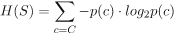

where 
 - S = The current data set for which entropy is being calculated - C – Set of classes in S 
 - C={yes , no} 
 - p(c) = The set S is perfectly classified

#### Information gain
Information gain calculates the reduction in entropy or surprise from transforming a dataset in some way. It is the measure of the measure of the difference in entropy from before to after the set S is split on an attribute A. It is commonly used in the construction of decision trees from a training dataset, by evaluating the information gain for each variable, and selecting the variable that maximizes the information gain, which in turn minimizes the entropy and best splits the dataset into groups for effective classification.

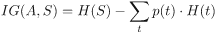

where
 - H(S) = Entropy of set S
 - T = The subsets created from splitting set S by attribute A
 - H(t) = Entropy of subset t
 - compute the entropy for data-set for every feature:
  - 1.calculate entropy for all categorical values.
  - 2.take average information entropy for the current attribute .
  - 3.calculate gain for the current attribute. 4.pick the highest gain attribute
  - Repeat until we get the tree we desired.
  
#### Gain Ratio
Gain ratio tries to the correct the information gain’s bias towards attributes with many possible values by adding a denominator to information gain called split information. Split Information tries to measure how broadly and uniformly the attribute splits the data:

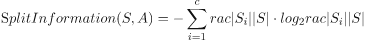

The Gain Ratio is defined in terms of Gain and SplitInformation as,



#### Gini Index
Gini Index is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set.

If our dataset is Pure then likelihood of incorrect classification is 0. If our sample is mixture of different classes then likelihood of incorrect classification will be high.

#### Optimizing DT
#### Criterion :
Optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and entropy for the information gain.

#### Splitter :
String, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

#### Max_depth :
Int or None, optional (default=’None’) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

#### Recursive Binary Splitting
In this procedure all the features are considered and different split points are tried and tested using a Cost function. The split with the best cost (or lowest cost) is selected.

#### When to stop splitting?
You might ask when to stop growing a tree? As a problem usually has a large set of features, it results in large number of split, which in turn gives a huge tree. Such trees are complex and can lead to overfitting. So, we need to know when to stop?

#### Pruning
The performance of a tree can be further increased by pruning. It involves removing the branches that make use of features having low importance. This way, we reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.

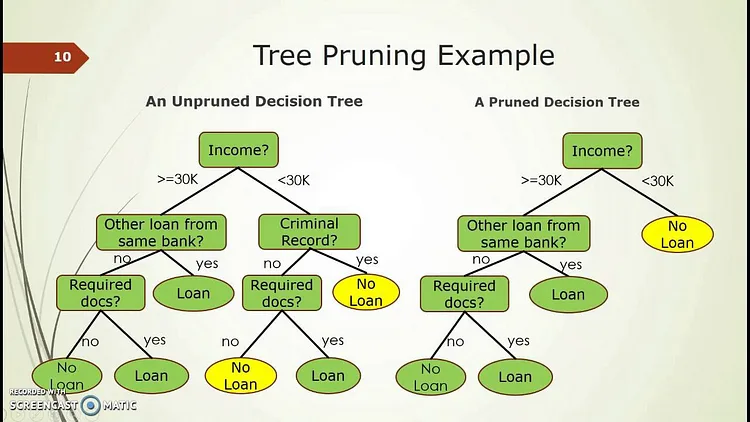


## Decision Tree Regressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
diabetes  = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
print (diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
diabetes.feature_names


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diabetes.target[: 10]


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [6]:
X = diabetes.data
y = diabetes.target
X.shape, y.shape

((442, 10), (442,))

In [7]:
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


#### Pairplot()
By default, this function will create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

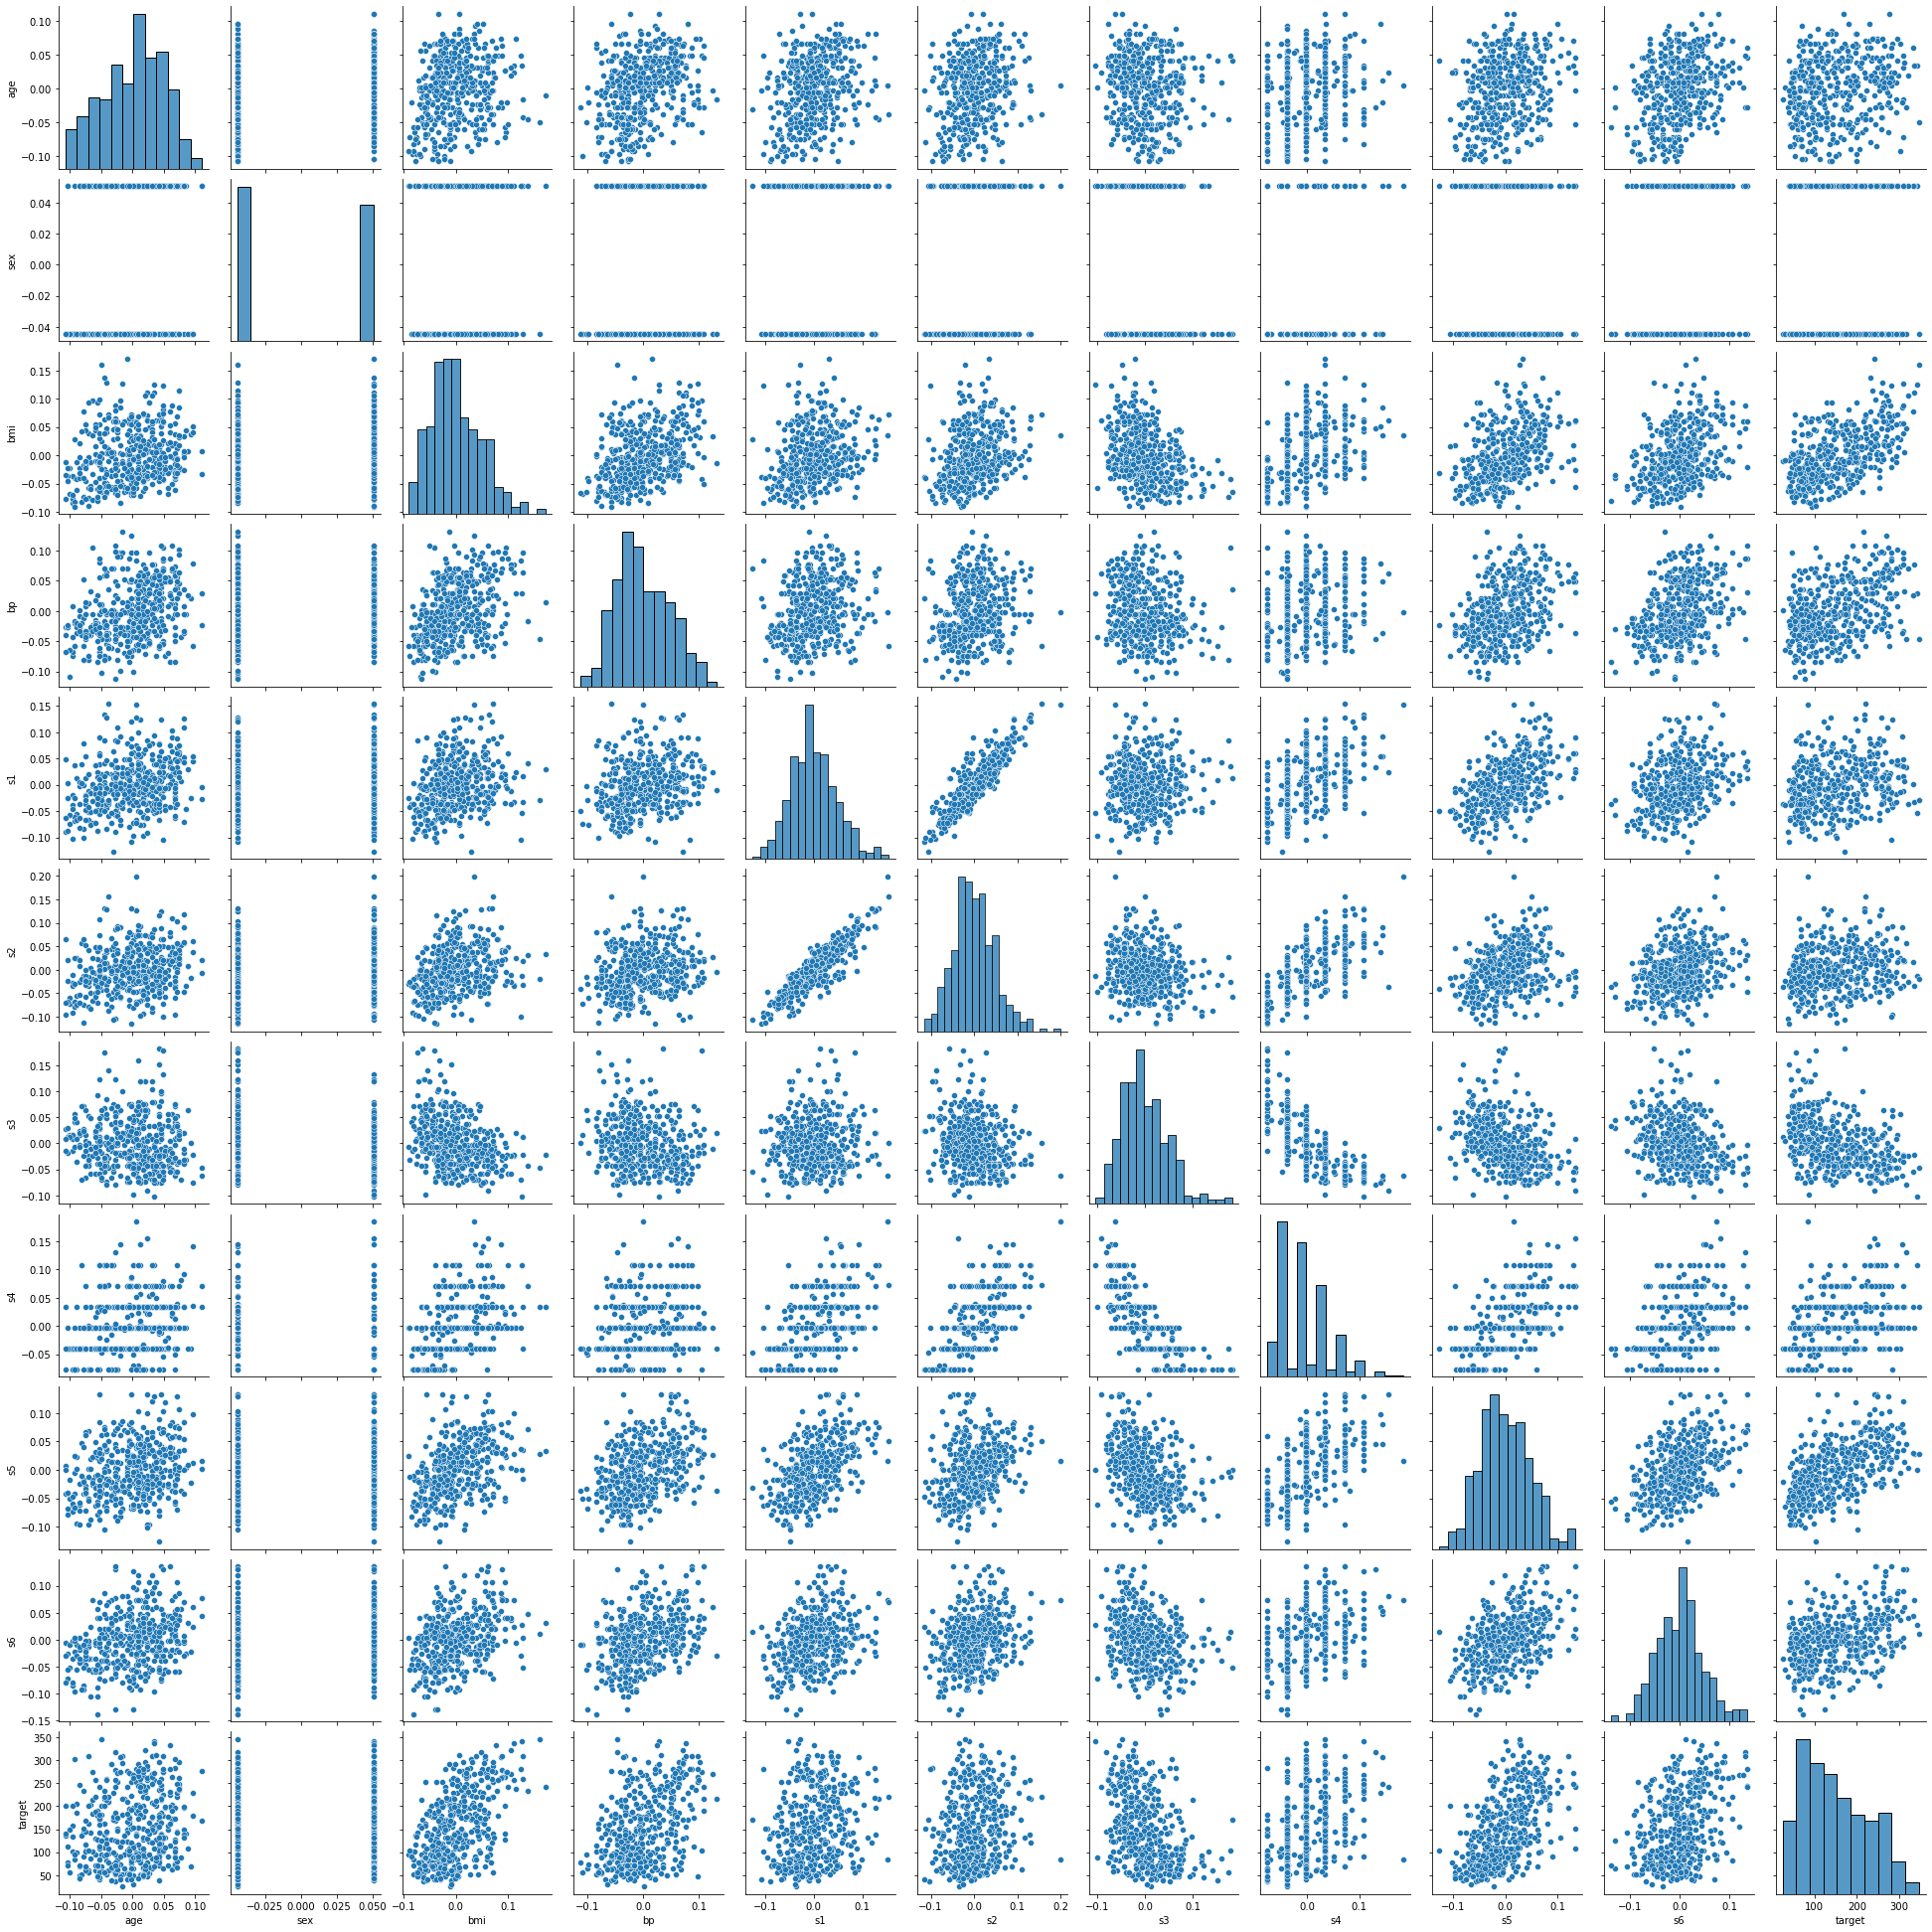

In [8]:
sns.pairplot(df)
plt.show()

Let’s see decision tree as regressor:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [10]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

The following plot shows predicted values of y and true values of y:

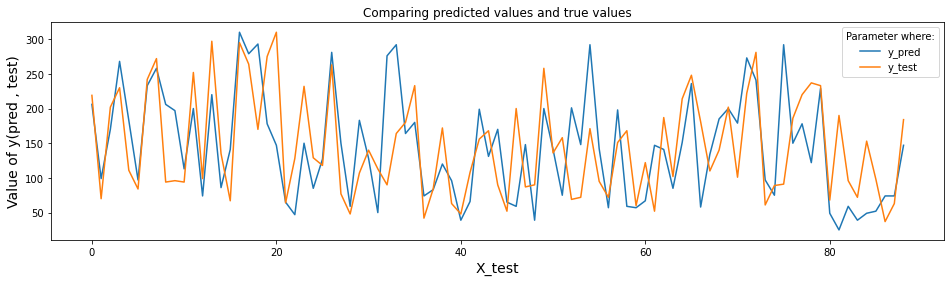

In [11]:
plt.figure(figsize=(16, 4))
plt.plot(y_pred,  label='y_pred')
plt.plot(y_test, label='y_test')
plt.xlabel('X_test', fontsize=14)
plt.ylabel('Value of y(pred , test)', fontsize=14)
plt.title('Comparing predicted values and true values')
plt.legend(title='Parameter where:')
plt.show()

Now, we will try to get the Root Mean Square Error of the data by using the function mean_squared_error().Let’s see the following code:

In [12]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

70.61829663921893

In [13]:
y_test.std()

72.78840394263774

#### Decision Tree as a Classifier
Let’s see decision tree as classifier using iris dataset:

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


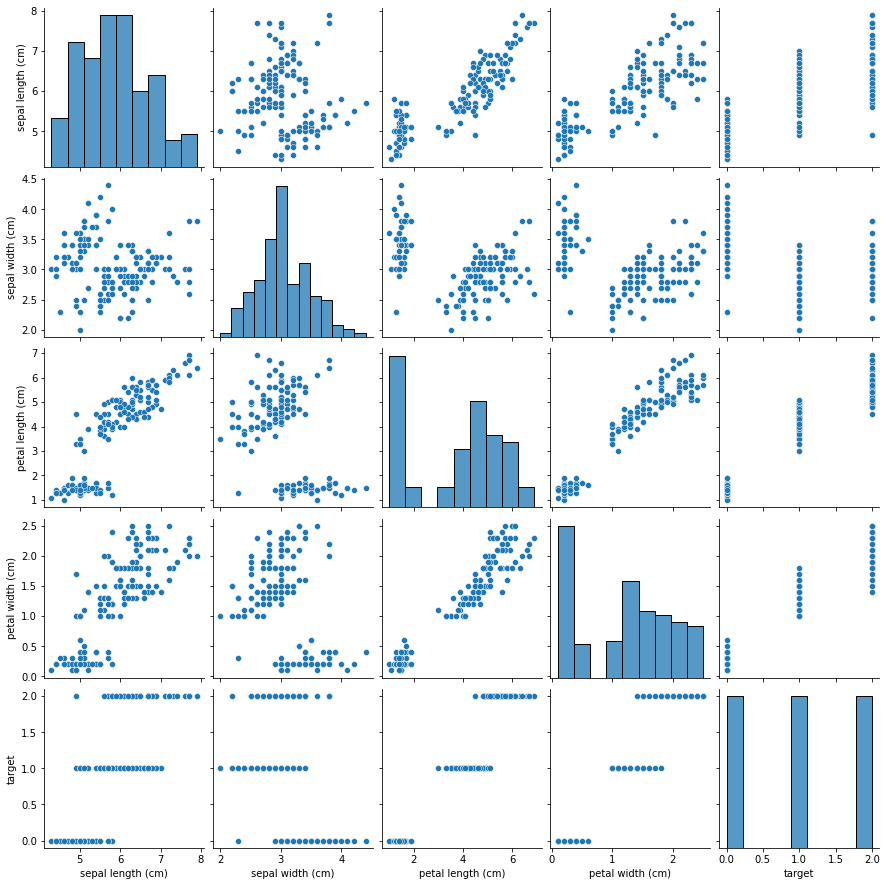

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2, stratify = y)
clf = DecisionTreeClassifier(criterion='gini', random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9666666666666667


Now we will evaluate the accuracy of the classifier by using confusion marix. For this we will use function confusion_matrix(). Each cell in the square box represents relateve or absolute ratios between y_test and y_pred .
Now let’s see the following script :

Confusion Matrix


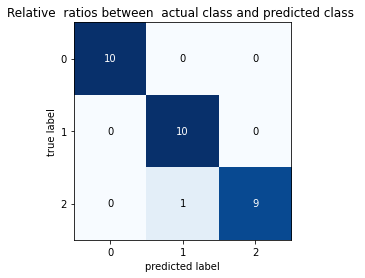

In [20]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Relative  ratios between  actual class and predicted class ')
plt.show()

#### Classification_report()
The classification_report function builds a text report showing the main classification metrics. Here is a small example with custom target_names and inferred labels.Now we will use of this function in the following code:

In [21]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

